# Taller sobre experimentación

## Preparación del ambiente

### Importe de librerias

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as snn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from scipy.stats import zscore

### Conexión con los datos

In [34]:
import scipy.io

mat = scipy.io.loadmat('sample_data/HSRfeatures.mat')
X = mat['X']
Y = mat['Y']
Y = Y[:,1]
print(Y.shape)
print(X.shape)

(13015,)
(13015, 27)


### Clasificacion en test y train

In [54]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape)
print(Ytrain.shape)

(9110, 27)
(9110,)


# Experimentos Realizados

##Svm

### Primera ejecución

In [61]:
mdl = svm.SVC()
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.855     0.786     0.819       992
           1      0.929     0.955     0.942      2913

    accuracy                          0.912      3905
   macro avg      0.892     0.870     0.881      3905
weighted avg      0.910     0.912     0.911      3905



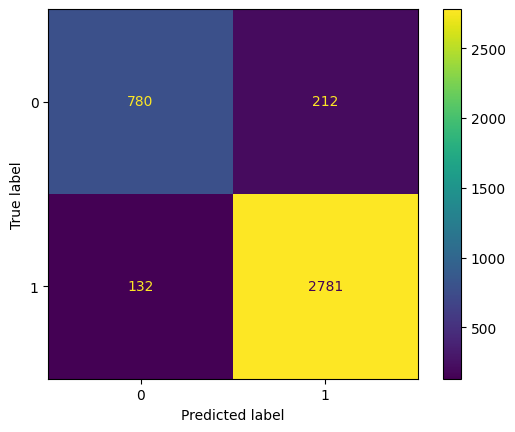

In [60]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

### Optimizado

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'poly']}

# Inicializar el modelo SVM
mdl = svm.SVC()

# Realizar búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(mdl, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain, Ytrain)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

              precision    recall  f1-score   support

           0      0.855     0.786     0.819       992
           1      0.929     0.955     0.942      2913

    accuracy                          0.912      3905
   macro avg      0.892     0.870     0.881      3905
weighted avg      0.910     0.912     0.911      3905



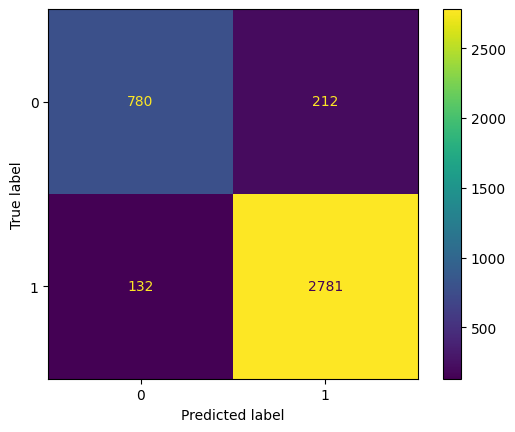

In [118]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

## Red Neural

### Primera Ejecución

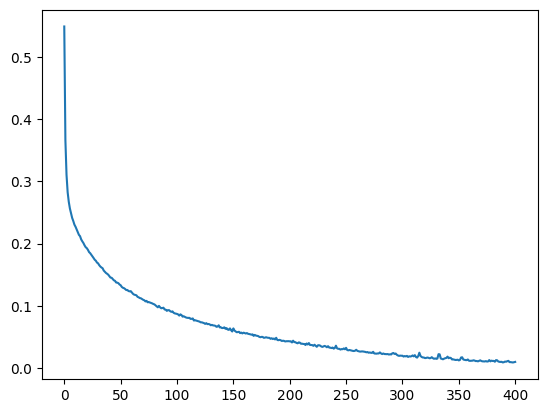

In [85]:
mdl = snn.MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000)
mdl.fit(Xtrain, Ytrain)
plt.plot(mdl.loss_curve_)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.840     0.824     0.832       992
           1      0.940     0.946     0.943      2913

    accuracy                          0.915      3905
   macro avg      0.890     0.885     0.887      3905
weighted avg      0.915     0.915     0.915      3905



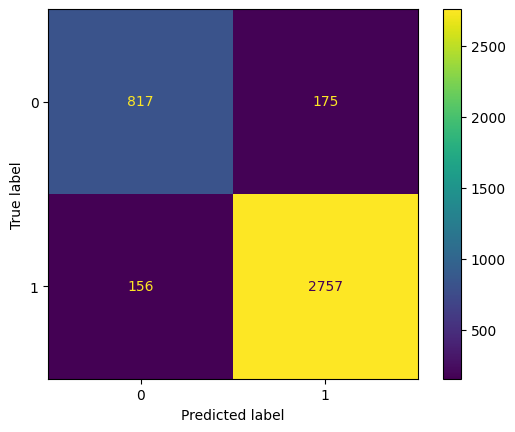

In [86]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

### Optimizado

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


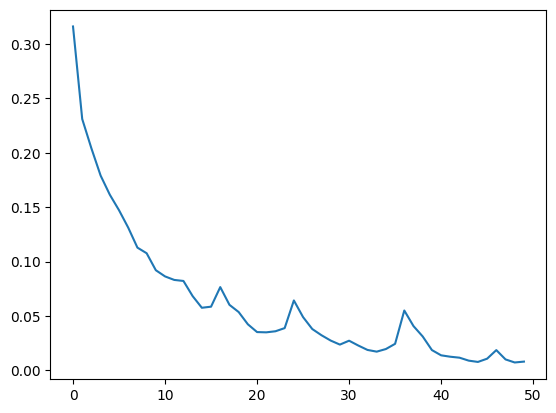

In [121]:
mdl = snn.MLPClassifier(hidden_layer_sizes=(1000,500,250), max_iter=5000)
mdl.fit(Xtrain, Ytrain)
plt.plot(mdl.loss_curve_)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.867     0.858     0.862       992
           1      0.952     0.955     0.953      2913

    accuracy                          0.930      3905
   macro avg      0.909     0.906     0.908      3905
weighted avg      0.930     0.930     0.930      3905



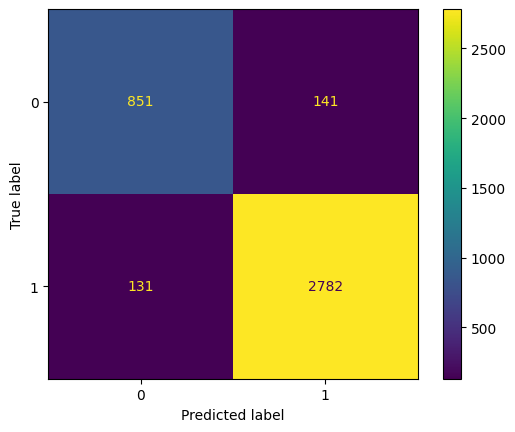

In [122]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();

## K-Vecino más cercano Regresivo

In [101]:
mdl = neighbors.KNeighborsClassifier(n_neighbors=1)
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)

              precision    recall  f1-score   support

           0      0.904     0.869     0.886       992
           1      0.956     0.968     0.962      2913

    accuracy                          0.943      3905
   macro avg      0.930     0.919     0.924      3905
weighted avg      0.943     0.943     0.943      3905



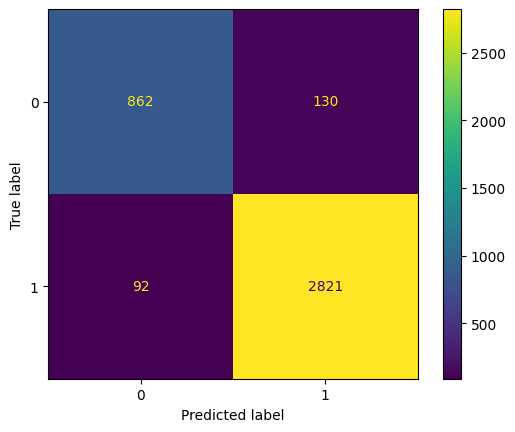

In [102]:
print(metrics.classification_report(Ytest, Ypred, labels=mdl.classes_, digits=3))
cm = metrics.confusion_matrix(Ytest, Ypred, labels=mdl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot();